## <span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#00b3e5;">Project Assignment : Supervised Learning

## <span style="font-family: Arial; font-weight:bold;font-size:1.25em;color:#00b3e5;">Domain:  Bank

### <span style="font-family: Arial; font-weight:bold;font-size:1.25em;color:#00b3e5;">Context:
<font color=darkblue>This case is about a bank (Thera Bank) whose management wants to explore ways of converting its liability customers to personal loan customers (while retaining them as depositors). A campaign that the bank ran last year for liability customers showed a healthy conversion rate of over 9% success. This has encouraged the retail marketing department to devise campaigns with better target marketing to increase the success ratio with minimal budget.</font> 

### <span style="font-family: Arial; font-weight:bold;font-size:1.25em;color:#00b3e5;">Attribute Information:
<font color=darkblue>
<b>ID :</b> Customer ID
<br><b>Age :</b> Customer's age in completed years
<br><b>Experience :</b> #years of professional experience
<br><b>Income :</b> Annual income of the customer
<br><b>ZIP Code :</b> Home Address ZIP code
<br><b>Family :</b> Family size of the customer
<br><b>CCAvg :</b> Average spending on credit cards per month
<br><b>Education :</b> Education Level
<ol>
<li>Undergrad</li>
<li>Graduate</li>
<li>Advanced/Professional</li>
</ol>
<b>Mortgage :</b> Value of house mortgage if any. 
<br><b>Personal Loan :</b> Did this customer accept the personal loan offered in the last campaign?
<br><b>Securities Account :</b> Does the customer have a securities account with the bank?
<br><b>CD Account :</b> Does the customer have a certificate of deposit (CD) account with the bank?
<br><b>Online :</b> Does the customer use internet banking facilities?
<br><b>Credit card :</b> Does the customer use a credit card issued by UniversalBank?
</font> 

### <span style="font-family: Arial; font-weight:bold;font-size:1.25em;color:#00b3e5;">Learning Outcomes:
<font color=darkblue>
<ul>
<li>Exploratory Data Analysis</li>
<li>Data Cleaning</li>
<li>Data Visualization</li>
<li>Prepare the data to Train a model</li>
<li>Build and Predict using classification models (Logistics, KNN and Naïve Bayes)</li>
<li>Generate Confusion Metrics</li>
<li>Model Evaluation</li>
</ul>
</font> 

### <span style="font-family: Arial; font-weight:bold;font-size:1.25em;color:#00b3e5;">Objective:
<font color=darkblue>Goal is to predict the likelihood of a liability customer buying personal loans Build Classification Model (Logistics Regression, K-Nearest Neighbors and Naïve Bayes) for prediction. Compare the models and find the better one</font>

### <span style="font-family: Arial; font-weight:bold;font-size:1.25em;color:#00b3e5;">Import the necessary libraries

In [189]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set()
%matplotlib inline

from sklearn import metrics
from sklearn import preprocessing
from sklearn import model_selection
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

import statsmodels.api as sm
from scipy import stats

import os

import warnings
warnings.filterwarnings('ignore')

### <span style="font-family: Arial; font-weight:bold;font-size:1.25em;color:#00b3e5;">Read the data

In [190]:
bank_df = pd.read_csv("Bank_Personal_Loan_Modelling.csv")
bank_df.head(10)

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1
5,6,37,13,29,92121,4,0.4,2,155,0,0,0,1,0
6,7,53,27,72,91711,2,1.5,2,0,0,0,0,1,0
7,8,50,24,22,93943,1,0.3,3,0,0,0,0,0,1
8,9,35,10,81,90089,3,0.6,2,104,0,0,0,1,0
9,10,34,9,180,93023,1,8.9,3,0,1,0,0,0,0


#### <span style="font-family: Arial; font-weight:bold;font-size:1.25em;color:#00b3e5;">Observation :
<font color=darkblue>
<b>Target Variable :</b>
<br><b>Personal Loan</b> - This indicates whether a customer has taken a loan or not. Prediction to be done on this variable.

<b>Numerical Columns :</b> 
<br><b>Age -</b> Age of Customer
<br><b>Experience -</b> Years of Experience
<br><b>Income -</b> Annual Income in dollars
<br><b>CCAvg -</b> Average spending on Credit Card per month in dollars
<br><b>Mortgage -</b> Value of House Mortgage

<b>Categorical Columns :</b>
<br><b>ID -</b> This is Customer ID has no relationship with Target variable, we can ignore this
<br><b>ZIP Code -</b> This indicates customer location, has no effect on Target Variable, we can ignore this
<br><b>Family -</b> Number of Family Numbers
<br><b>Education -</b> Level of Education (Under Graduate, Graduate, Advanced/Professional)
<br><b>Securities Account -</b> Whether Customer has Securities Account (Y/N)
<br><b>CD Account -</b> Whether Customer has CD Account (Y/N)
<br><b>Online -</b> Whether Customer has Online Banking Facility (Y/N)
<br><b>Credit Card -</b> Whether Customer has Credit Card (Y/N)
</font>

### <span style="font-family: Arial; font-weight:bold;font-size:1.25em;color:#00b3e5;">Shape of Data :
<font color=darkblue>
</font>

In [191]:
bank_df.shape

(5000, 14)

#### <span style="font-family: Arial; font-weight:bold;font-size:1.25em;color:#00b3e5;">Observation :
<font color=darkblue>
The dataset has 5000 rows and 14 columns
</font>

In [192]:
bank_df.dtypes

ID                      int64
Age                     int64
Experience              int64
Income                  int64
ZIP Code                int64
Family                  int64
CCAvg                 float64
Education               int64
Mortgage                int64
Personal Loan           int64
Securities Account      int64
CD Account              int64
Online                  int64
CreditCard              int64
dtype: object

### <span style="font-family: Arial; font-weight:bold;font-size:1.25em;color:#00b3e5;">Checking presence of Missing Values :
<font color=darkblue>
</font>

In [193]:
bank_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


#### <span style="font-family: Arial; font-weight:bold;font-size:1.25em;color:#00b3e5;">Observation :
<font color=darkblue>
Dataset has no missing values in any of the columns
</font>

### <span style="font-family: Arial; font-weight:bold;font-size:1.25em;color:#00b3e5;">Checking presence of Missing Values :
<font color=darkblue>
</font>

In [194]:
bank_df.isnull().values.any()

False

#### <span style="font-family: Arial; font-weight:bold;font-size:1.25em;color:#00b3e5;">Observation :
<font color=darkblue>
Dataset has no missing values in any of the columns
</font>

### <span style="font-family: Arial; font-weight:bold;font-size:1.25em;color:#00b3e5;">Unique Check :
<font color=darkblue>
</font>

In [195]:
bank_df.nunique()

ID                    5000
Age                     45
Experience              47
Income                 162
ZIP Code               467
Family                   4
CCAvg                  108
Education                3
Mortgage               347
Personal Loan            2
Securities Account       2
CD Account               2
Online                   2
CreditCard               2
dtype: int64

In [196]:
bank_df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,5000.0,2500.500000,1443.520003,1.0,1250.75,2500.5,3750.25,5000.0
Age,5000.0,45.338400,11.463166,23.0,35.00,45.0,55.00,67.0
Experience,5000.0,20.104600,11.467954,-3.0,10.00,20.0,30.00,43.0
Income,5000.0,73.774200,46.033729,8.0,39.00,64.0,98.00,224.0
ZIP Code,5000.0,93152.503000,2121.852197,9307.0,91911.00,93437.0,94608.00,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.00,2.0,3.00,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.70,1.5,2.50,10.0
Education,5000.0,1.881000,0.839869,1.0,1.00,2.0,3.00,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.00,0.0,101.00,635.0
Personal Loan,5000.0,0.096000,0.294621,0.0,0.00,0.0,0.00,1.0


#### <span style="font-family: Arial; font-weight:bold;font-size:1.25em;color:#00b3e5;">Observation :
<font color=darkblue>
Experience column has Negative values as the Minimum value in the column is -3. Check and fix the negative values in this column.
</font>

### <span style="font-family: Arial; font-weight:bold;font-size:1.25em;color:#00b3e5;">Checking the Negative Values in Experience column :
<font color=darkblue>
</font>

In [197]:
any(bank_df['Experience']<0)

True

In [198]:
bank_df[bank_df['Experience']<0]['Experience'].value_counts()

-1    33
-2    15
-3     4
Name: Experience, dtype: int64

#### <span style="font-family: Arial; font-weight:bold;font-size:1.25em;color:#00b3e5;">Observation :
<font color=darkblue>
Experience column has -1, -2, -3 as negative values
</font>

### <span style="font-family: Arial; font-weight:bold;font-size:1.25em;color:#00b3e5;">Fix Negative Values with replacing them with Median value of the column :
<font color=darkblue>
</font>

In [199]:
median_experiance = bank_df.loc[:,'Experience'].median()
bank_df.loc[:,'Experience'].replace([-1, -2, -3], 
                                    [median_experiance, median_experiance, median_experiance], inplace=True)

In [200]:
any(bank_df['Experience']<0)

False

In [201]:
bank_df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,5000.0,2500.500000,1443.520003,1.0,1250.75,2500.5,3750.25,5000.0
Age,5000.0,45.338400,11.463166,23.0,35.00,45.0,55.00,67.0
Experience,5000.0,20.327600,11.253035,0.0,11.00,20.0,30.00,43.0
Income,5000.0,73.774200,46.033729,8.0,39.00,64.0,98.00,224.0
ZIP Code,5000.0,93152.503000,2121.852197,9307.0,91911.00,93437.0,94608.00,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.00,2.0,3.00,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.70,1.5,2.50,10.0
Education,5000.0,1.881000,0.839869,1.0,1.00,2.0,3.00,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.00,0.0,101.00,635.0
Personal Loan,5000.0,0.096000,0.294621,0.0,0.00,0.0,0.00,1.0


#### <span style="font-family: Arial; font-weight:bold;font-size:1.25em;color:#00b3e5;">Observation :
<font color=darkblue>
Negative values in Experience column is replaced with respetive Median value. Now the Mininum value in this column is 0
</font>

## <span style="font-family: Arial; font-weight:bold;font-size:1.25em;color:#00b3e5;">Data Visualization
<font color=darkblue>
</font>

### <span style="font-family: Arial; font-weight:bold;font-size:1.25em;color:#00b3e5;">Univariate Analysis of Continuous Variables :
<font color=darkblue>
</font>

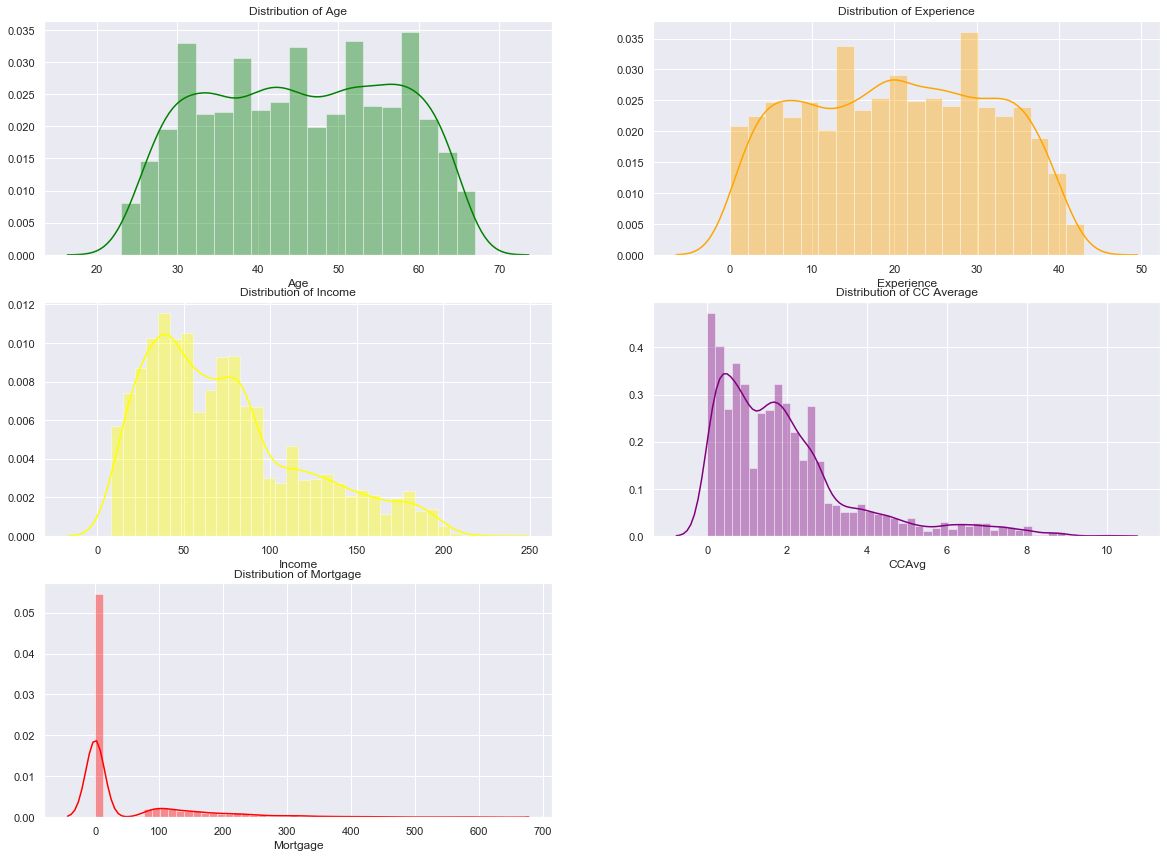

In [202]:
plt.figure(figsize=(20,25))

# subplot 1
plt.subplot(5, 2, 1)
plt.title('Distribution of Age')
sns.distplot(bank_df['Age'],color='green')

# subplot 2
plt.subplot(5, 2, 2)
plt.title('Distribution of Experience')
sns.distplot(bank_df['Experience'],color='orange')

# subplot 3
plt.subplot(5, 2, 3)
plt.title('Distribution of Income')
sns.distplot(bank_df['Income'],color='yellow')

# subplot 4
plt.subplot(5, 2, 4)
plt.title('Distribution of CC Average')
sns.distplot(bank_df['CCAvg'],color='purple')

# subplot 5
plt.subplot(5, 2, 5)
plt.title('Distribution of Mortgage')
sns.distplot(bank_df['Mortgage'],color='red')

plt.show()

#### <span style="font-family: Arial; font-weight:bold;font-size:1.25em;color:#00b3e5;">Observation :
<font color=darkblue>
<ul>
<li>Age and Experience columns are Normally Distributed</li>
<li>Income CC Average and Mortgage columns are Highly Skewed</li>
</ul>
</font>

### <span style="font-family: Arial; font-weight:bold;font-size:1.25em;color:#00b3e5;">Skewness Check :
<font color=darkblue>
</font>

In [203]:
Skewness = pd.DataFrame({'Skewness' : [stats.skew(bank_df.Age),stats.skew(bank_df.Experience),
                                       stats.skew(bank_df.Income),stats.skew(bank_df.CCAvg),
                                       stats.skew(bank_df.Mortgage)]}, 
                        index=['Age', 'Experience', 'Income', 'CCAvg', 'Mortgage'])

Skewness

,Skewness
Age,-0.029332
Experience,-0.014096
Income,0.841086
CCAvg,1.597964
Mortgage,2.103371


#### <span style="font-family: Arial; font-weight:bold;font-size:1.25em;color:#00b3e5;">Observation :
<font color=darkblue>
<ul>
<li>Age and Experience columns are Symmetric</li>
<li>Income CC Average and Mortgage columns are Positively Skewed</li>
</ul>
</font>

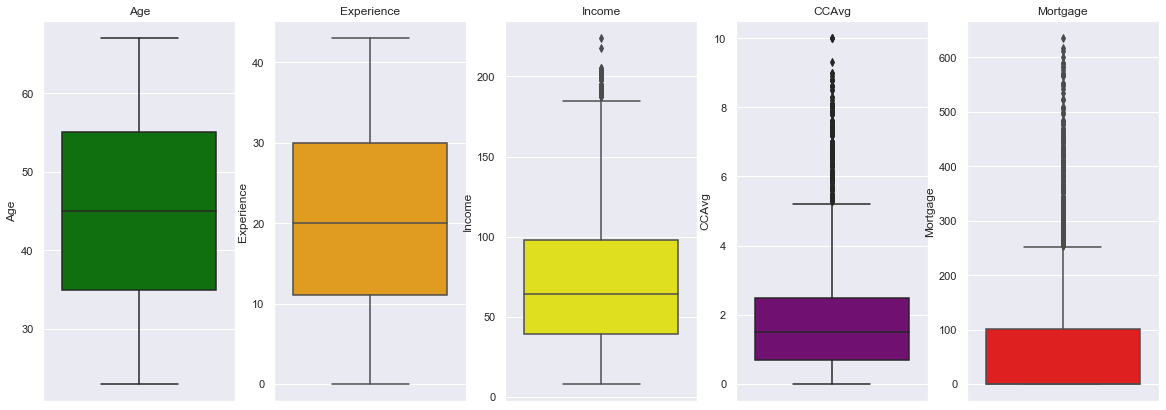

In [204]:
plt.figure(figsize=(20,7))

# subplot 1
plt.subplot(1, 5, 1)
plt.title('Age')
sns.boxplot(bank_df['Age'],orient='vertical',color='green')

# subplot 2
plt.subplot(1, 5, 2)
plt.title('Experience')
sns.boxplot(bank_df['Experience'],orient='vertical',color='orange')

# subplot 3
plt.subplot(1, 5, 3)
plt.title('Income')
sns.boxplot(bank_df['Income'],orient='vertical',color='yellow')

# subplot 4
plt.subplot(1, 5, 4)
plt.title('CCAvg')
sns.boxplot(bank_df['CCAvg'],orient='vertical',color='purple')

# subplot 5
plt.subplot(1, 5, 5)
plt.title('Mortgage')
sns.boxplot(bank_df['Mortgage'],orient='vertical',color='red')

plt.show()


#### <span style="font-family: Arial; font-weight:bold;font-size:1.25em;color:#00b3e5;">Observation :
<font color=darkblue>
<ol>
<li><b>Age</b> is normally distributed with most customers between 35 and 55 Years</li>
<li><b>Experience</b> is normally distributed with most customers having 11 to 30 Years of Exp</li>
<li><b>Income</b> Positively skewed, most customers have income between 45K to 55K</li>
<li><b>CCAvg</b> Positively skewed, most customers avg CC spending between 0K to 10K</li>
<li><b>Mortgage</b>, most customers have mortgage less than 40K</li>
</ol>
</font>

### <span style="font-family: Arial; font-weight:bold;font-size:1.25em;color:#00b3e5;">Univariate Analysis of Categorical Variables :
<font color=darkblue>
</font>

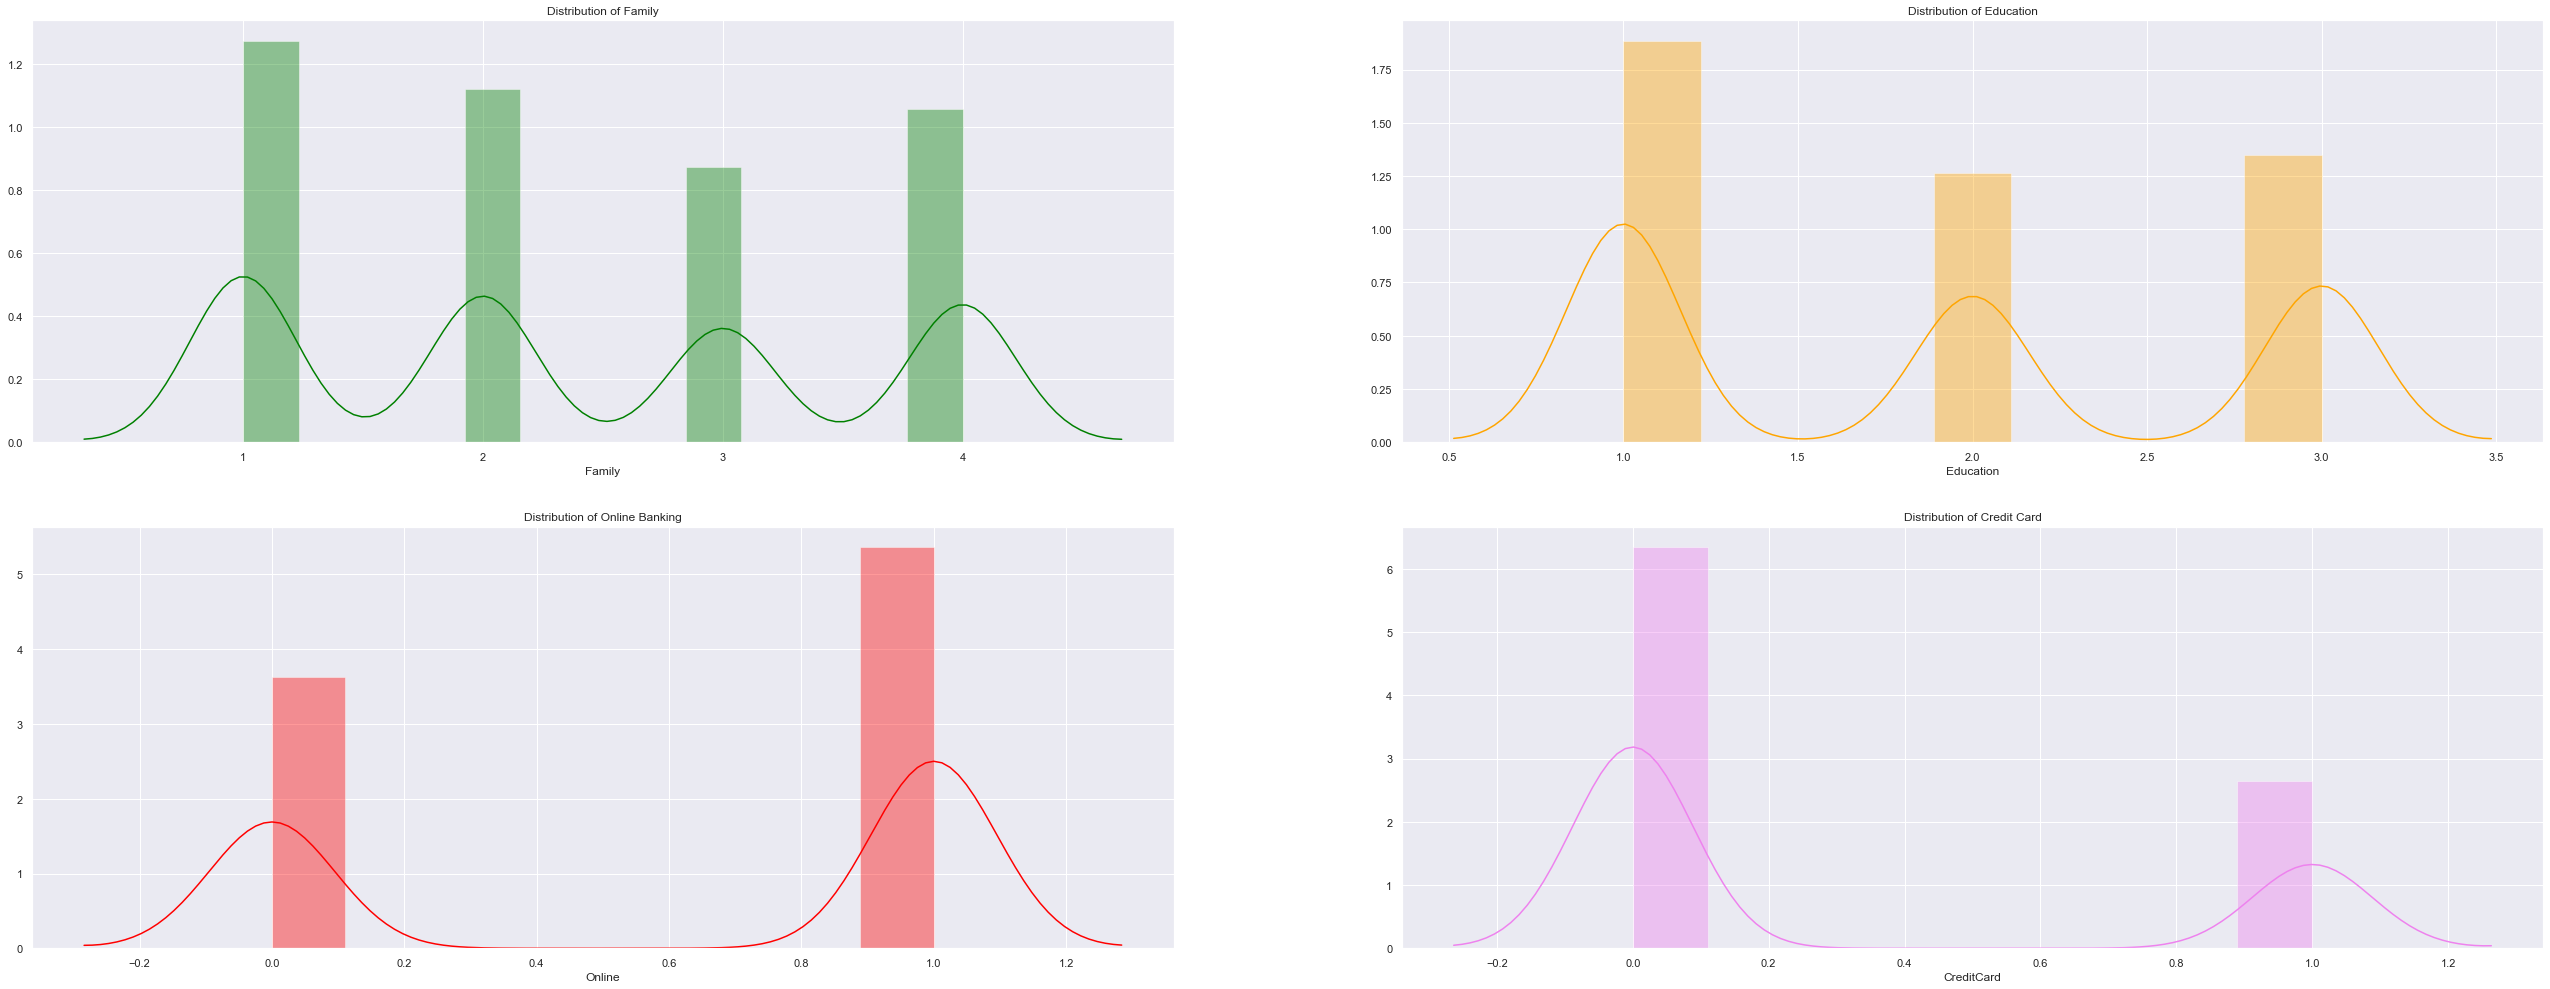

In [205]:
plt.figure(figsize=(45,45))

# subplot 1
plt.subplot(5, 2, 1)
plt.title('Distribution of Family')
sns.distplot(bank_df['Family'],color='green')

# subplot 2
plt.subplot(5, 2, 2)
plt.title('Distribution of Education')
sns.distplot(bank_df['Education'],color='orange')

# subplot 3
plt.subplot(5, 2, 3)
plt.title('Distribution of Online Banking')
sns.distplot(bank_df['Online'],color='red')

# subplot 4
plt.subplot(5, 2, 4)
plt.title('Distribution of Credit Card')
sns.distplot(bank_df['CreditCard'],color='violet')

plt.show()

#### <span style="font-family: Arial; font-weight:bold;font-size:1.25em;color:#00b3e5;">Observation :
<font color=darkblue>
Family is evenly distributed
</font>

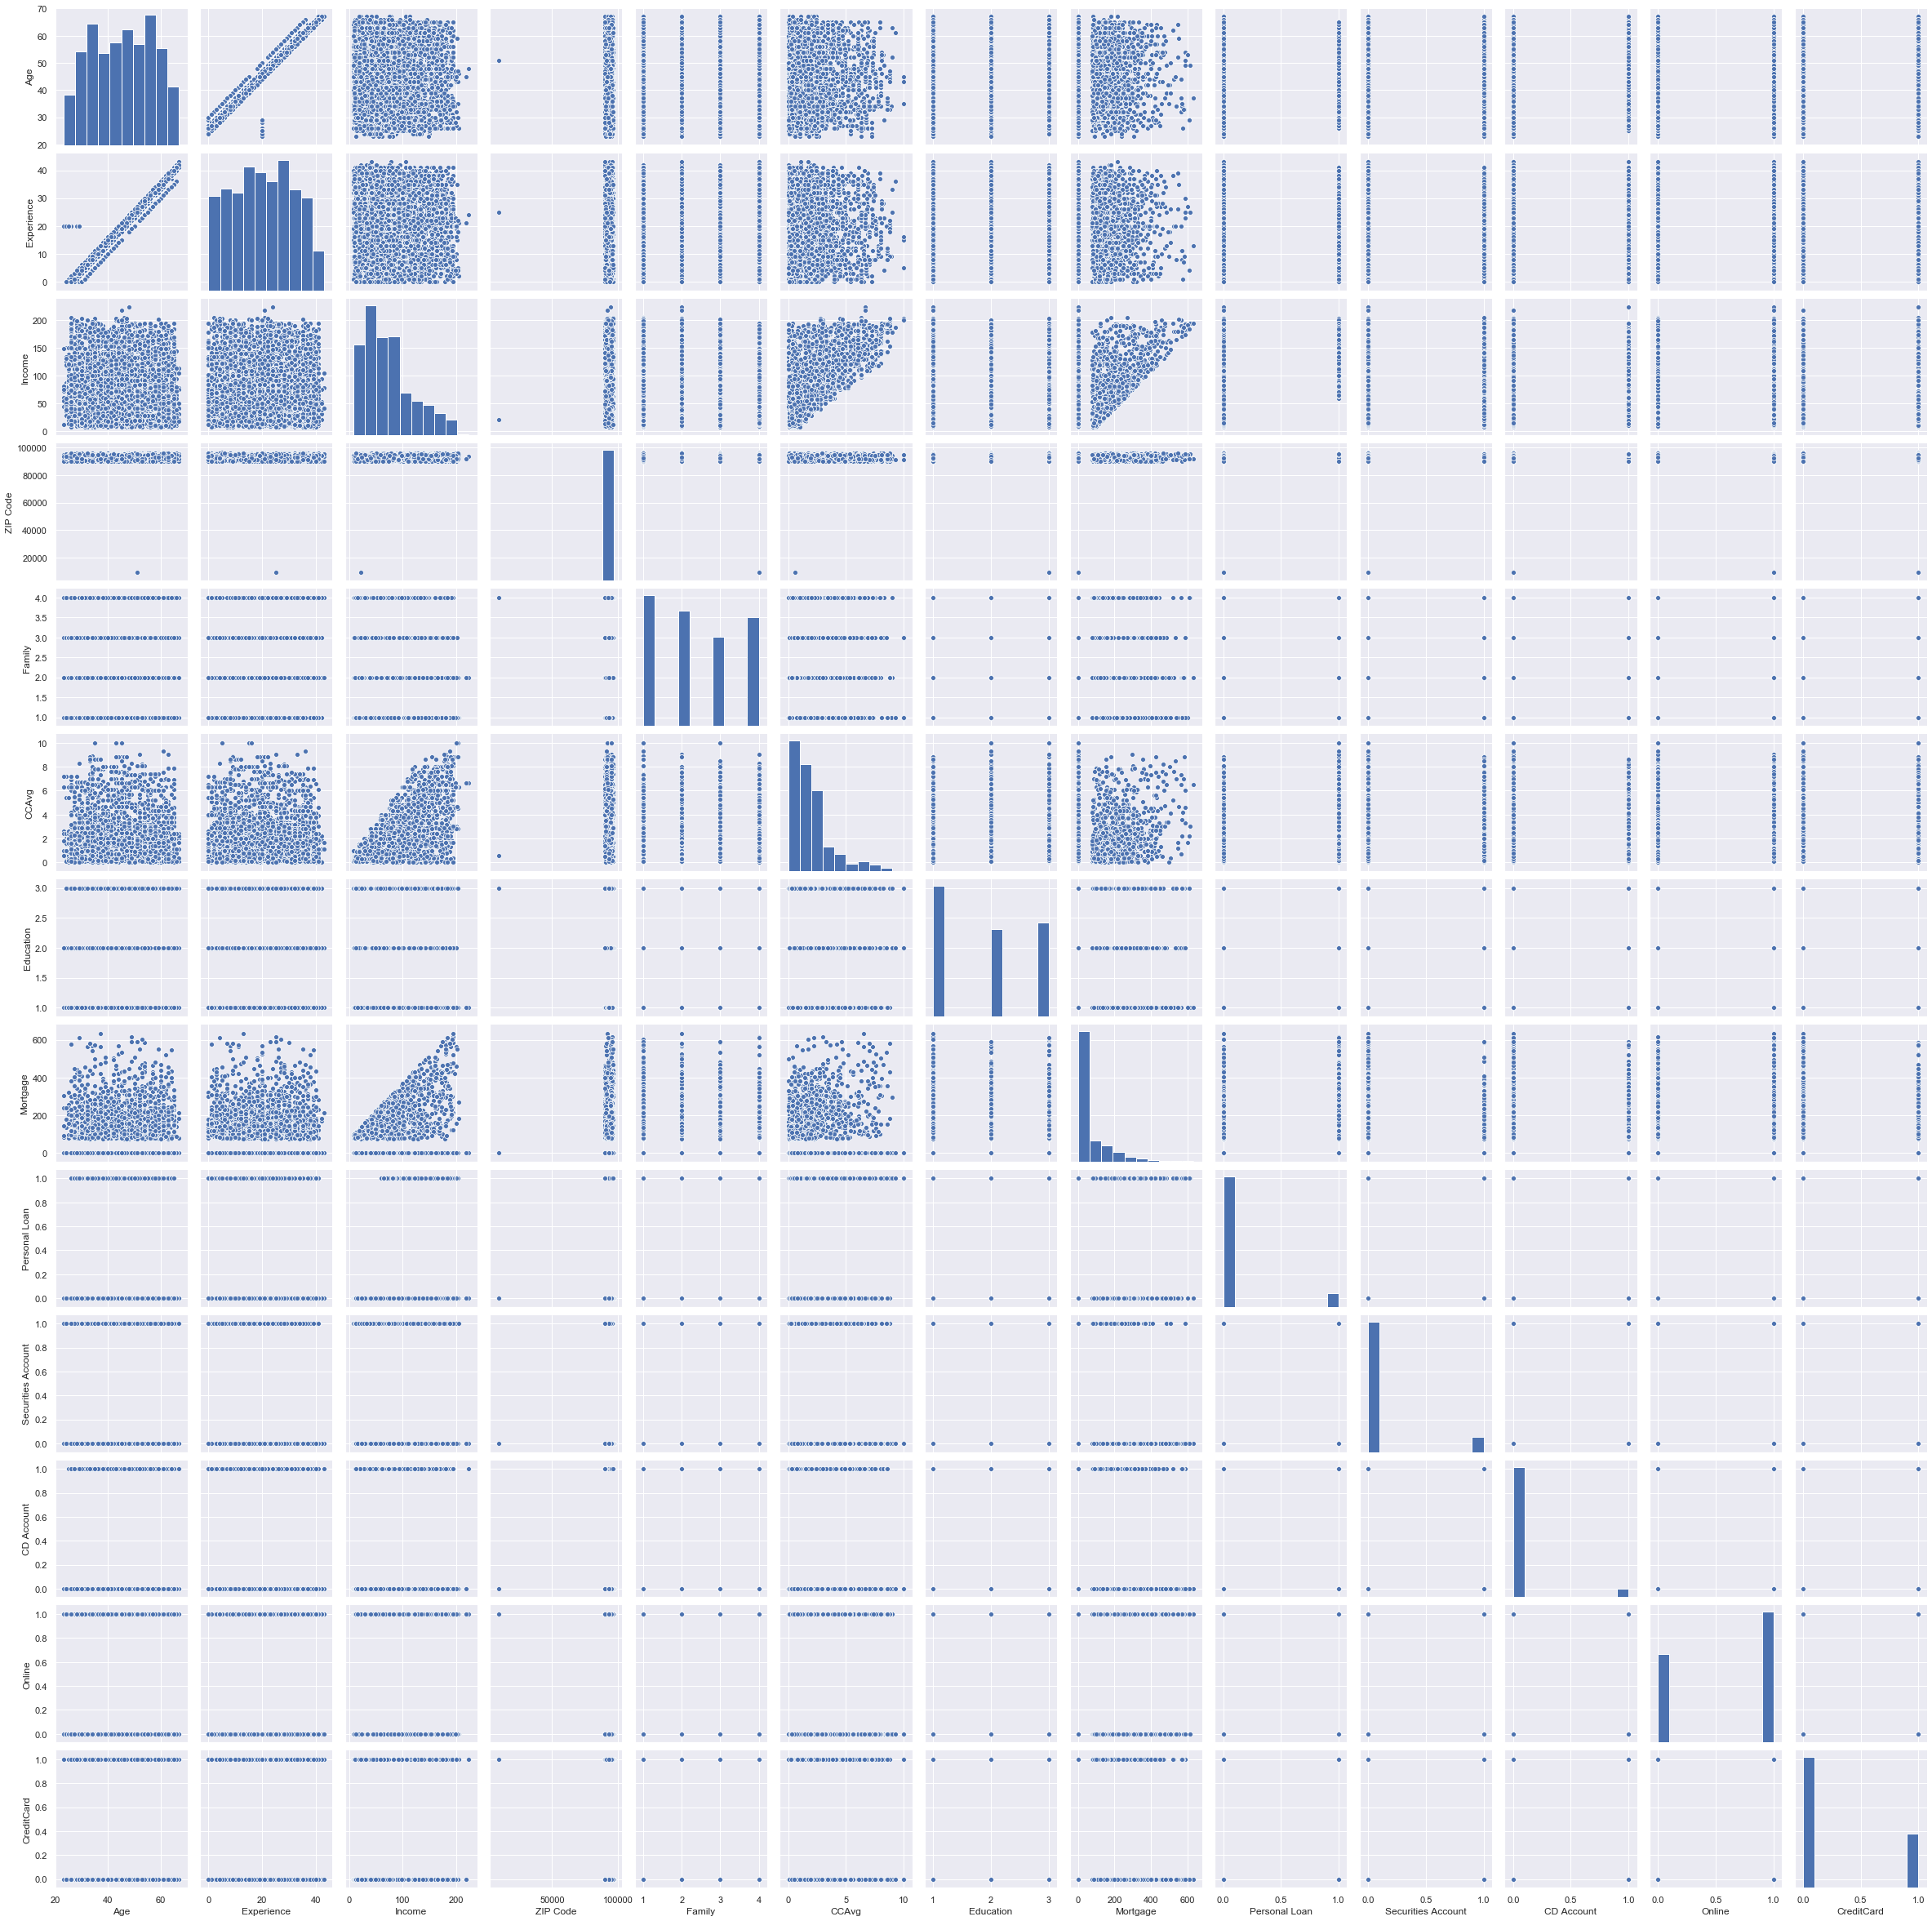

In [206]:
sns.pairplot(bank_df.iloc[:,1:])


#### <span style="font-family: Arial; font-weight:bold;font-size:1.25em;color:#00b3e5;">Observation :
<font color=darkblue>
<ul>
<li>Age has a association with Experience</li>
<li>Income, Mortgage and CCAvg are positively skewed</li>
</ul>
</font>

### <span style="font-family: Arial; font-weight:bold;font-size:1.25em;color:#00b3e5;">Analysis on Dependent Variable :
<font color=darkblue>
</font>

In [207]:
bank_df['Personal Loan'].value_counts().to_frame()

,Personal Loan
0,4520
1,480


#### <span style="font-family: Arial; font-weight:bold;font-size:1.25em;color:#00b3e5;">Observation :
<font color=darkblue>
Of Total 5000 rows, 4520 rows labelled as 0 and 480 rows labelled as 1 
</font>

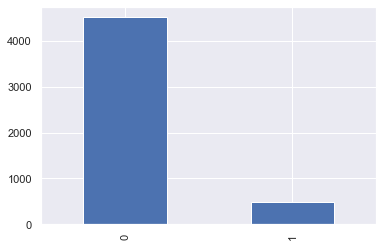

In [208]:
pd.value_counts(bank_df['Personal Loan']).plot(kind="bar")

#### <span style="font-family: Arial; font-weight:bold;font-size:1.25em;color:#00b3e5;">Observation :
<font color=darkblue>
Of Total 5000 rows, 4520 rows labelled as 0 and 480 rows labelled as 1 
</font>

### <span style="font-family: Arial; font-weight:bold;font-size:1.25em;color:#00b3e5;">Influence of Independent Variables on Target Variable :
<font color=darkblue>
</font>

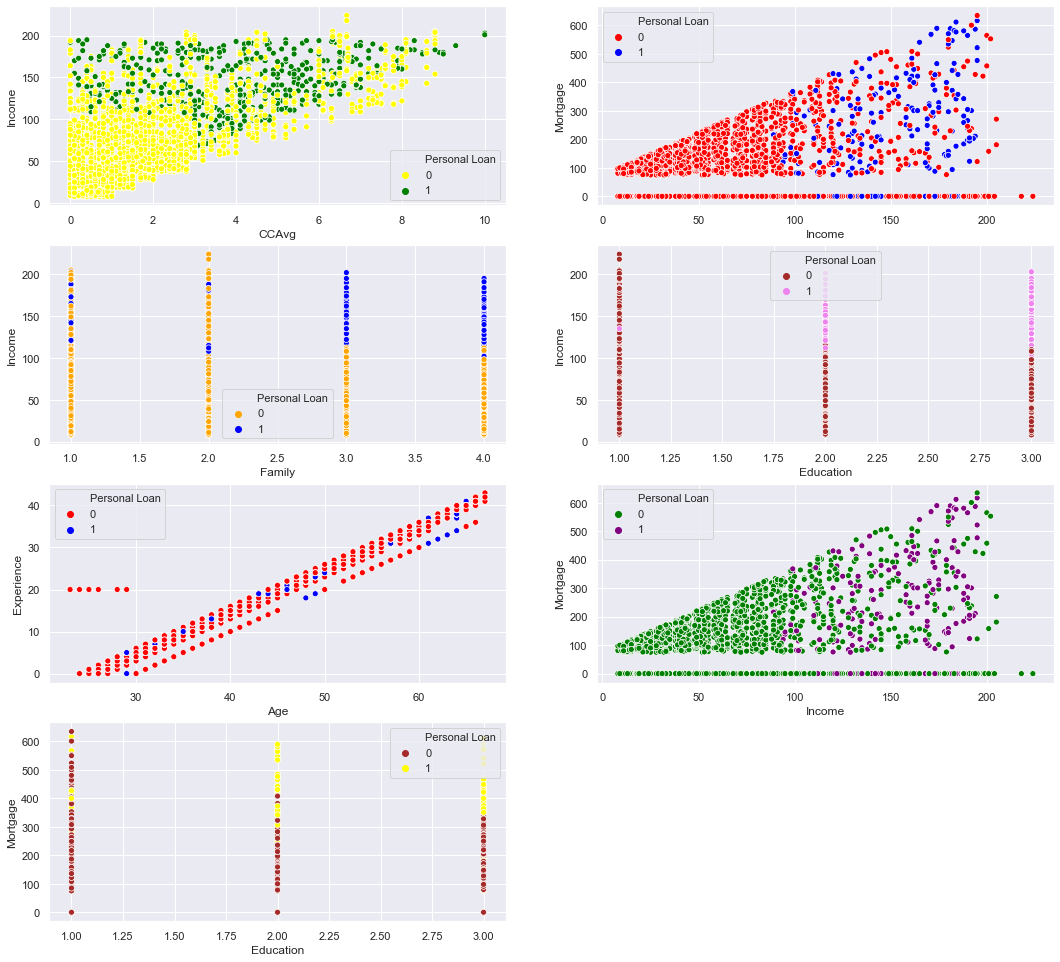

In [209]:
plt.figure(figsize=(18,30))

plt.subplot(7,2,1)
sns.scatterplot(bank_df.CCAvg, bank_df.Income, hue = bank_df['Personal Loan'], palette= ['yellow','green'])

plt.subplot(7,2,2)
sns.scatterplot(bank_df.Income, bank_df.Mortgage, hue = bank_df['Personal Loan'], palette= ['red','blue'])

plt.subplot(7,2,3)
sns.scatterplot(bank_df.Family, bank_df.Income, hue = bank_df['Personal Loan'], palette= ['orange','blue'])

plt.subplot(7,2,4)
sns.scatterplot(bank_df.Education, bank_df.Income, hue = bank_df['Personal Loan'], palette= ['brown','violet'])

plt.subplot(7,2,5)
sns.scatterplot(bank_df.Age, bank_df.Experience, hue = bank_df['Personal Loan'], palette= ['red','blue'])

plt.subplot(7,2,6)
sns.scatterplot(bank_df.Income, bank_df.Mortgage, hue = bank_df['Personal Loan'], palette= ['green','purple'])

plt.subplot(7,2,7)
sns.scatterplot(bank_df.Education, bank_df.Mortgage, hue = bank_df['Personal Loan'], palette= ['brown','yellow'])


#### <span style="font-family: Arial; font-weight:bold;font-size:1.25em;color:#00b3e5;">Observation :
<font color=darkblue>
<ul>
<li>Persons with personal loan have a higher credit card average.</li>
<li>Persons with more than 3 family members, need of loan is more</li>
<li>More the Income there is increaes in Mortgage</li>
<li>Age is highly associated with Education</li>
<li>Persos with Education level 1 has taken more perosnal loan</li>
</ul>
</font>

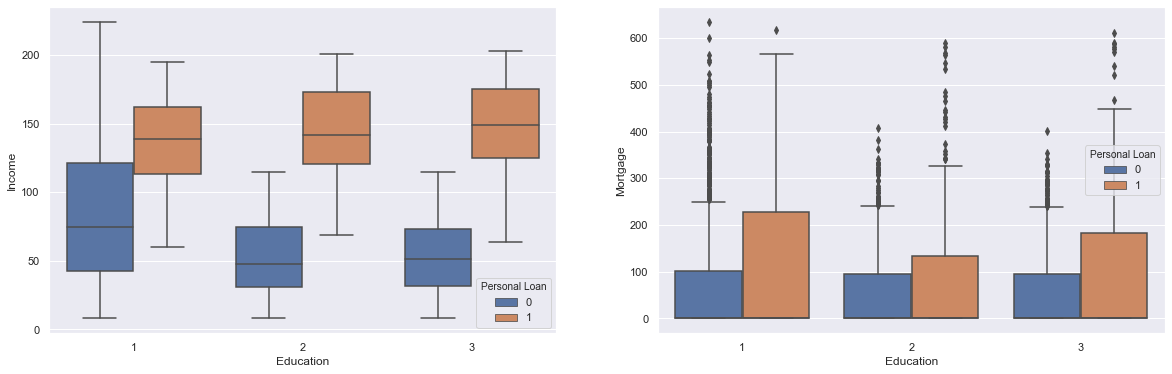

In [210]:
plt.figure(figsize=(20,6))

# subplot 1
plt.subplot(1, 2, 1)
sns.boxplot(x='Education', y='Income', hue='Personal Loan', data=bank_df)

# subplot 2
plt.subplot(1, 2, 2)
sns.boxplot(x='Education', y='Mortgage', hue='Personal Loan', data=bank_df)

plt.show()


#### <span style="font-family: Arial; font-weight:bold;font-size:1.25em;color:#00b3e5;">Observation :
<font color=darkblue>
<ul>
<li>Customers who has taken loan has higher income compared to who has not taken loan across all education levels</li>
<li>Customers who has taken loan has higher mortage than who has nt taken loan across all education level</li>
</ul>
</font>

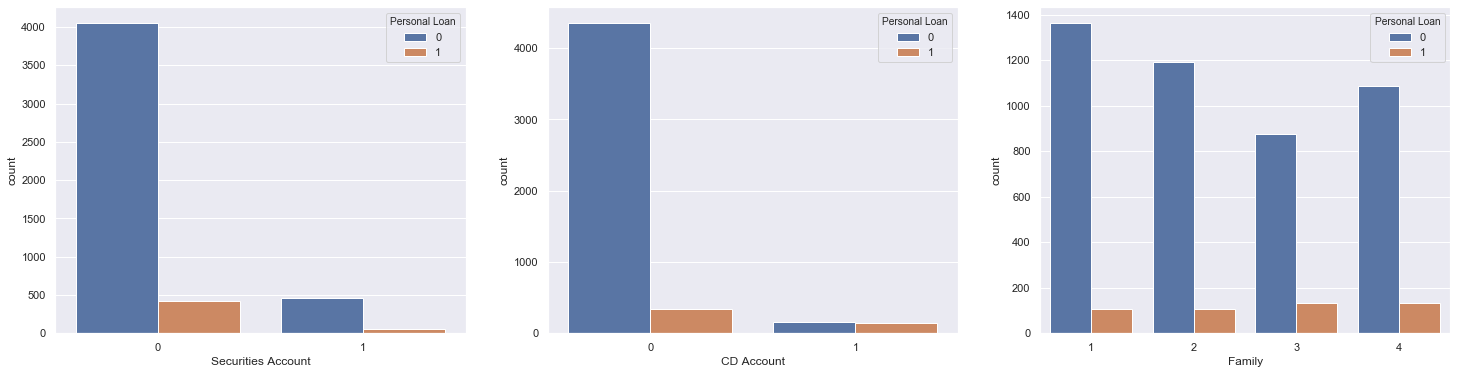

In [211]:
plt.figure(figsize=(25,6))

plt.subplot(1,3,1)
sns.countplot(x="Securities Account", data=bank_df, hue="Personal Loan")

plt.subplot(1,3,2)
sns.countplot(x='CD Account', data=bank_df, hue='Personal Loan')

plt.subplot(1,3,3)
sns.countplot(x='Family', data=bank_df, hue='Personal Loan')


#### <span style="font-family: Arial; font-weight:bold;font-size:1.25em;color:#00b3e5;">Observation :
<font color=darkblue>
<ul>
<li>Majority of Customers who don't have loan also don't have Securities Account, Customers with Secirities Account are likey to take loan</li>
<li>Customers who don't have loan also don't have CD Account, Customers with CD Account are likey to take loan</li>
<li>Family with 3 or more members are likely to take loan</li>
</ul>
</font>

Text(0.5, 1.0, 'CCAvg Distribution')

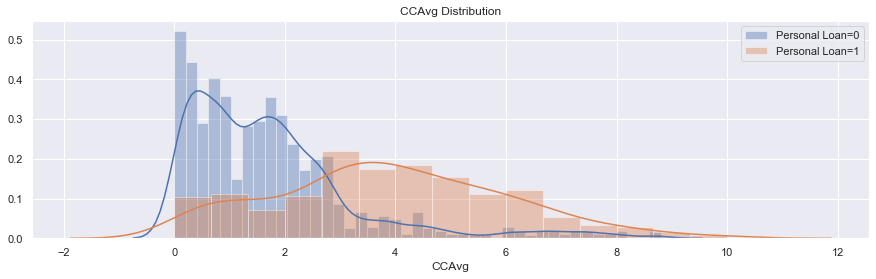

In [212]:
plt.figure(figsize=(15,4))
sns.distplot(bank_df[bank_df["Personal Loan"] == 0]['CCAvg'], label='Personal Loan=0')
sns.distplot(bank_df[bank_df["Personal Loan"] == 1]['CCAvg'], label='Personal Loan=1')
plt.legend()
plt.title("CCAvg Distribution")


#### <span style="font-family: Arial; font-weight:bold;font-size:1.25em;color:#00b3e5;">Observation :
<font color=darkblue>
Customers taken personal loan have higher credit card average comperd to those not taken loan. 
</font>

Text(0.5, 1.0, 'Income Distribution')

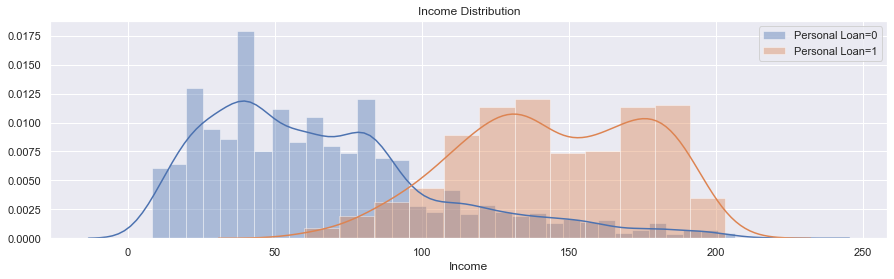

In [213]:
plt.figure(figsize=(15,4))
sns.distplot(bank_df[bank_df["Personal Loan"] == 0]['Income'], label='Personal Loan=0')
sns.distplot(bank_df[bank_df["Personal Loan"] == 1]['Income'], label='Personal Loan=1')
plt.legend()
plt.title("Income Distribution")


#### <span style="font-family: Arial; font-weight:bold;font-size:1.25em;color:#00b3e5;">Observation :
<font color=darkblue>
Customers with higher income have taken personal loan
</font>

### <span style="font-family: Arial; font-weight:bold;font-size:1.25em;color:#00b3e5;">Correlation Check :
<font color=darkblue>
</font>

In [214]:
bank_df[['Personal Loan', 'Age', 'Income', 'CCAvg', 'Mortgage']].corr()

,Personal Loan,Age,Income,CCAvg,Mortgage
Personal Loan,1.000000,-0.007726,0.502462,0.366889,0.142095
Age,-0.007726,1.000000,-0.055269,-0.052012,-0.012539
Income,0.502462,-0.055269,1.000000,0.645984,0.206806
CCAvg,0.366889,-0.052012,0.645984,1.000000,0.109905
Mortgage,0.142095,-0.012539,0.206806,0.109905,1.000000


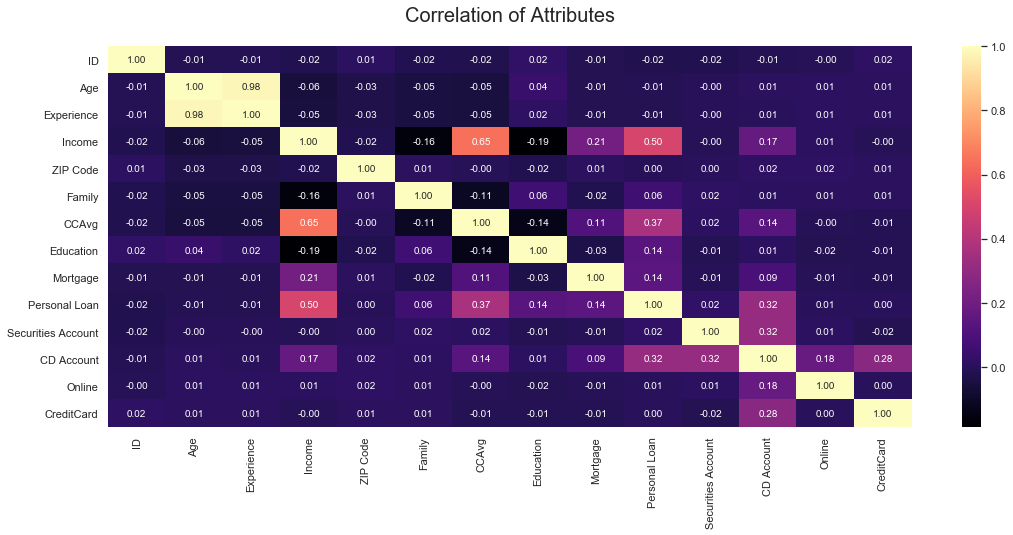

In [215]:
plt.figure(figsize = (18,7))
plt.title('Correlation of Attributes', y=1.05, size=20)
sns.heatmap(bank_df.corr(), cmap='magma',annot=True, fmt='.2f')


#### <span style="font-family: Arial; font-weight:bold;font-size:1.25em;color:#00b3e5;">Observation :
<font color=darkblue>
<ul>
<li>Age and Experience are highly correlated</li>
<li>Income and CCAvg are moderlately correlated</li>
</ul> 
</font>

### <span style="font-family: Arial; font-weight:bold;font-size:1.25em;color:#00b3e5;">Reduce Dimensions :
<font color=darkblue>
As suggested earlier we will drop ID and ZIP Code columns
</font>

In [216]:
bank_df = bank_df.drop(['ID', 'ZIP Code'], axis=1)

In [217]:
bank_df.shape

(5000, 12)

In [218]:
bank_df.head(2)

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,1.0,49,4,1.6,1,0,0,1,0,0,0
1,45,19.0,34,3,1.5,1,0,0,1,0,0,0


### <span style="font-family: Arial; font-weight:bold;font-size:1.25em;color:#00b3e5;">Split Data :
<font color=darkblue>
We will drop Experience column from Train Test Split dataframe due to it's high association with other columns
</font>

In [219]:
X_Indepenent = bank_df.drop(['Experience', 'Personal Loan'], axis=1)
Y_Target = bank_df[['Personal Loan']]

In [220]:
X_train, X_test, y_train, y_test = train_test_split(X_Indepenent, Y_Target, test_size=0.3, random_state=1)

In [221]:
print('X train data {}' .format(X_train.shape))
print('X test data {}' .format(X_test.shape))
print('Y train data {}' .format(y_train.shape))
print('Y test data {}' .format(y_test.shape))

X train data (3500, 10)
X test data (1500, 10)
Y train data (3500, 1)
Y test data (1500, 1)


#### <span style="font-family: Arial; font-weight:bold;font-size:1.25em;color:#00b3e5;">Observation :
<font color=darkblue>
Data split into train and test with 70:30 ratio
</font>

### <span style="font-family: Arial; font-weight:bold;font-size:1.25em;color:#00b3e5;">Model - Logistic Regression :
<font color=darkblue>
</font>

In [222]:
model_logit = LogisticRegression(solver="liblinear")
model_logit.fit(X_train, y_train)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [223]:
model_logit_y_predicted = model_logit.predict(X_test)
model_logit_score = model_logit.score(X_test, y_test)
model_logit_accuracy = accuracy_score(y_test, model_logit_y_predicted)
model_logit_cm = metrics.confusion_matrix(y_test, model_logit_y_predicted)
model_logit_cp = classification_report(y_test, model_logit_y_predicted)

In [224]:
print('Logistic Regression Model Accuracy : %f' %model_logit_accuracy)
print('\nLogistic Regression Confusion Matrix : \n', model_logit_cm)
print('True Positive : ', model_logit_cm[1][1])
print('False Positive : ', model_logit_cm[0][1])
print('False Negative : ', model_logit_cm[1][0])
print('True Negative : ', model_logit_cm[0][0])
print('\nLogistic Regression Classification Report : \n', model_logit_cp)

Logistic Regression Model Accuracy : 0.942667

Logistic Regression Confusion Matrix : 
 [[1338   13]
 [  73   76]]
True Positive :  76
False Positive :  13
False Negative :  73
True Negative :  1338

Logistic Regression Classification Report : 
               precision    recall  f1-score   support

           0       0.95      0.99      0.97      1351
           1       0.85      0.51      0.64       149

    accuracy                           0.94      1500
   macro avg       0.90      0.75      0.80      1500
weighted avg       0.94      0.94      0.94      1500



In [225]:

print(model_logit_cp)


              precision    recall  f1-score   support

           0       0.95      0.99      0.97      1351
           1       0.85      0.51      0.64       149

    accuracy                           0.94      1500
   macro avg       0.90      0.75      0.80      1500
weighted avg       0.94      0.94      0.94      1500



#### <span style="font-family: Arial; font-weight:bold;font-size:1.25em;color:#00b3e5;">Observation :
<font color=darkblue>
<ul>
<li>Accuracy using Logistic Regression Model is 94.1%</li>
</ul>
</font>

### <span style="font-family: Arial; font-weight:bold;font-size:1.25em;color:#00b3e5;">Model - K-Nearest Neighbors :
<font color=darkblue>
</font>

#### <span style="font-family: Arial; font-weight:bold;font-size:1.25em;color:#00b3e5;">Determine Optimal K :
<font color=darkblue>
Find the best K value using Misclassification error
</font>

In [226]:
nList = list(range(1,20))
neighbors = list(filter(lambda x: x % 2 != 0, nList))	# Subsetting just the odd ones

ac_scores = []	# Empty list to hold accuracy scores

# Perform accuracy metrics for odd numbers (1 to 19)
for k in neighbors:
    model_knn = KNeighborsClassifier(n_neighbors=k)
    model_knn.fit(X_train, y_train.values.ravel())					# fit the model
    model_knn_y_predicted = model_knn.predict(X_test)					# predict the response
    model_knn_score = accuracy_score(y_test, model_knn_y_predicted)			# Evaluate accuracy
    ac_scores.append(model_knn_score)							# insert scores to the list

MSE = [1 - x for x in ac_scores]							# Change to misclassification error
optimal_k = neighbors[MSE.index(min(MSE))]						# Determining best k

In [227]:
# print accuracy scores, misclassification error and optimal k value
print('\nOdd Neighbors : \n', neighbors)
print('\nAccuracy Scores : \n', ac_scores)
print('\nMisclassification Error : \n', MSE)
print("\nOptimal number of neighbors is k=%d" % optimal_k)



Odd Neighbors : 
 [1, 3, 5, 7, 9, 11, 13, 15, 17, 19]

Accuracy Scores : 
 [0.9086666666666666, 0.9093333333333333, 0.906, 0.9026666666666666, 0.9053333333333333, 0.908, 0.908, 0.9066666666666666, 0.9073333333333333, 0.904]

Misclassification Error : 
 [0.09133333333333338, 0.09066666666666667, 0.09399999999999997, 0.09733333333333338, 0.09466666666666668, 0.09199999999999997, 0.09199999999999997, 0.09333333333333338, 0.09266666666666667, 0.09599999999999997]

Optimal number of neighbors is k=3


#### <span style="font-family: Arial; font-weight:bold;font-size:1.25em;color:#00b3e5;">Observation :
<font color=darkblue>
Optimal K value is 3
</font>

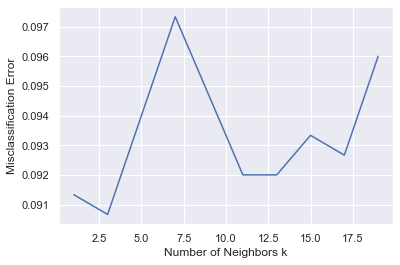

In [228]:
plt.plot(neighbors, MSE)
plt.xlabel('Number of Neighbors k')
plt.ylabel('Misclassification Error')
plt.show()

In [229]:
model_knn = KNeighborsClassifier(n_neighbors=optimal_k, weights='uniform', metric='euclidean')
model_knn.fit(X_train, y_train)										# fit the model
model_knn_y_predicted = model_knn.predict(X_test)							# predict the response
model_knn_accuracy = accuracy_score(y_test, model_knn_y_predicted)						# Evaluate accuracy
model_knn_cm = metrics.confusion_matrix(y_test, model_knn_y_predicted)
model_knn_cp = classification_report(y_test, model_knn_y_predicted)

In [230]:
print('KNN Model Accuracy : %f' %model_knn_accuracy)
print('\nKNN Confusion Matrix : \n', model_knn_cm)
print('True Positive : ', model_knn_cm[1][1])
print('False Positive : ', model_knn_cm[0][1])
print('False Negative : ', model_knn_cm[1][0])
print('True Negative : ', model_knn_cm[0][0])
print('\nKNN Classification Report : \n', model_knn_cp)

KNN Model Accuracy : 0.909333

KNN Confusion Matrix : 
 [[1304   47]
 [  89   60]]
True Positive :  60
False Positive :  47
False Negative :  89
True Negative :  1304

KNN Classification Report : 
               precision    recall  f1-score   support

           0       0.94      0.97      0.95      1351
           1       0.56      0.40      0.47       149

    accuracy                           0.91      1500
   macro avg       0.75      0.68      0.71      1500
weighted avg       0.90      0.91      0.90      1500



#### <span style="font-family: Arial; font-weight:bold;font-size:1.25em;color:#00b3e5;">Observation :
<font color=darkblue>
<ul>
<li>Accuracy using K-Nearest Neighbor Model is 90.9%</li>
</ul>
</font>

### <span style="font-family: Arial; font-weight:bold;font-size:1.25em;color:#00b3e5;">Model - Naive Bayes :
<font color=darkblue>
</font>

In [231]:
model_gnb = GaussianNB()
model_gnb.fit(X_train, y_train)


GaussianNB(priors=None, var_smoothing=1e-09)

In [232]:
model_gnb_y_predicted = model_gnb.predict(X_test)
model_gnb_score = model_gnb.score(X_test, y_test)
model_gnb_accuracy = accuracy_score(y_test, model_gnb_y_predicted)
model_gnb_cm = metrics.confusion_matrix(y_test, model_gnb_y_predicted)
model_gnb_cp = classification_report(y_test, model_gnb_y_predicted)

In [233]:
print('Naive Bayes Model Accuracy : %f' %model_gnb_accuracy)
print('\nNaive Bayes Confusion Matrix : \n', model_gnb_cm)
print('True Positive : ', model_gnb_cm[1][1])
print('False Positive : ', model_gnb_cm[0][1])
print('False Negative : ', model_gnb_cm[1][0])
print('True Negative : ', model_gnb_cm[0][0])
print('\nNaive Bayes Classification Report : \n', model_gnb_cp)

Naive Bayes Model Accuracy : 0.874667

Naive Bayes Confusion Matrix : 
 [[1227  124]
 [  64   85]]
True Positive :  85
False Positive :  124
False Negative :  64
True Negative :  1227

Naive Bayes Classification Report : 
               precision    recall  f1-score   support

           0       0.95      0.91      0.93      1351
           1       0.41      0.57      0.47       149

    accuracy                           0.87      1500
   macro avg       0.68      0.74      0.70      1500
weighted avg       0.90      0.87      0.88      1500



#### <span style="font-family: Arial; font-weight:bold;font-size:1.25em;color:#00b3e5;">Observation :
<font color=darkblue>
<ul>
<li>Accuracy using Naive Bayes Model is 87.4%</li>
</ul>
</font>

### <span style="font-family: Arial; font-weight:bold;font-size:1.25em;color:#00b3e5;">Confusion Metrics :
<font color=darkblue>
Print Confusion Matrix for all three models
</font>

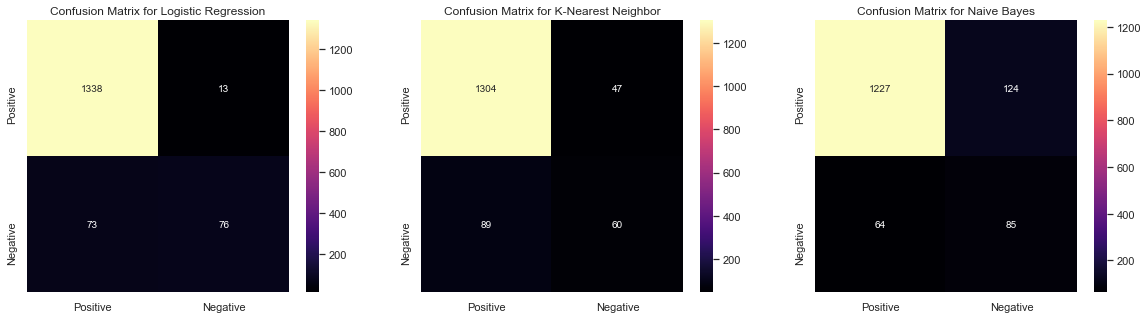

In [234]:
# Confusion Matrix for Logistics Regression
class_label = ["Positive", "Negative"]
logit_cm = pd.DataFrame(model_logit_cm, index=class_label, columns=class_label)
knn_cm = pd.DataFrame(model_knn_cm, index=class_label, columns=class_label)
gnb_cm = pd.DataFrame(model_gnb_cm, index=class_label, columns=class_label)

# Generate and Show Plot
plt.figure(figsize=(20,5))
plt.xlabel("Predicted Label")
plt.ylabel("True Label")

plt.subplot(1,3,1)
plt.title('Confusion Matrix for Logistic Regression')
sns.heatmap(logit_cm, cmap='magma',annot=True, fmt='d')

plt.subplot(1,3,2)
plt.title('Confusion Matrix for K-Nearest Neighbor')
sns.heatmap(knn_cm, cmap='magma',annot=True, fmt='d')

plt.subplot(1,3,3)
plt.title('Confusion Matrix for Naive Bayes')
sns.heatmap(gnb_cm, cmap='magma',annot=True, fmt='d')

plt.show()


### <span style="font-family: Arial; font-weight:bold;font-size:1.25em;color:#00b3e5;">Model Evaluation :
<font color=darkblue>
</font>

In [236]:
models = []
models.append(('LR', LogisticRegression()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('NB', GaussianNB()))

results = []
names = []
for name, model in models:
    kfold = model_selection.KFold(n_splits=10, random_state=100)
    cv_results = model_selection.cross_val_score(model, X_Indepenent, Y_Target, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    res = "%s : %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(res)

LR : 0.941800 (0.008646)
KNN : 0.914600 (0.011351)
NB : 0.883000 (0.011567)


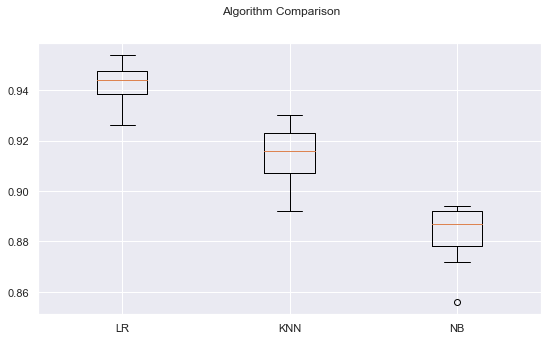

In [237]:
fig = plt.figure(figsize=(9,5))
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

#### <span style="font-family: Arial; font-weight:bold;font-size:1.25em;color:#00b3e5;">Observation :
<font color=darkblue>
<ul>
<li>Logistic Regression Model with Accuracy Score of 94.1% is better of all three models</li>
</ul>
</font>

#### <span style="font-family: Arial; font-weight:bold;font-size:1.25em;color:#00b3e5;">Conclusion :
<font color=darkblue>
<ul>
<li>Objective of the Bank is to liability customer to buy personal loan</li>
<li>Three Classification Models (Logistic Regression, KNN and Naive Bayes) were used for study</li>
<li>Of the three models, Logistic Regression Model has the highest accuracy. We will choose Logistic Regression Model as final for our evaluation</li>
</ul>
</font>